<a href="https://colab.research.google.com/github/Burakgunal4/data_mining_and_machine_learning/blob/main/Data_Mining_and_Machine_Learning_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
pip install --upgrade scikit-learn


In [42]:
import pandas as pd
data=pd.read_csv('/content/slr.csv')


1. Define X and Y

In [43]:
X = data[['chirps per second']]
y = data['temperature (F)']




2. Train-Test Split the Data

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)


3. Instantiate the Model

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
slr_model = LinearRegression()

4. Fit the Model on Train Set

In [48]:
slr_model.fit(X_train, y_train)

LinearRegression()

In [49]:
slope = slr_model.coef_
y_intercept = slr_model.intercept_


In [50]:
slope



array([3.54577187])

In [51]:
y_intercept

np.float64(20.624799623415704)

5. Make Predictions on Train Set

In [52]:
y_pred_train = slr_model.predict(X_train)

6. Evaluate the Fit on Train Set

In [54]:
from sklearn.metrics import r2_score, mean_squared_error


In [55]:
r2_train = r2_score(y_train, y_pred_train)



In [56]:
mse_train = mean_squared_error(y_train, y_pred_train)

7. Make Predictions on Test Set

In [59]:
y_pred_test = slr_model.predict(X_test)

8. Evaluate Performance on Test Set

In [58]:
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)


Model building in Scikit-learn

In [62]:
#import pandas
import pandas as pd

#load dataset
pima=pd.read_csv('/content/diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Selecting Feature

In [63]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BMI','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable


Splitting Data

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=0)


Model Development and Prediction

In [65]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
logreg.fit(X1_train, y_train)

y_pred=logreg.predict(X1_test)


Model Evaluation using Confusion Matrix

In [68]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print (accuracy)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

0.7916666666666666


array([[117,  13],
       [ 27,  35]])

Visualizing Confusion Matrix using Heatmap

Text(0.5, 427.9555555555555, 'Predicted label')

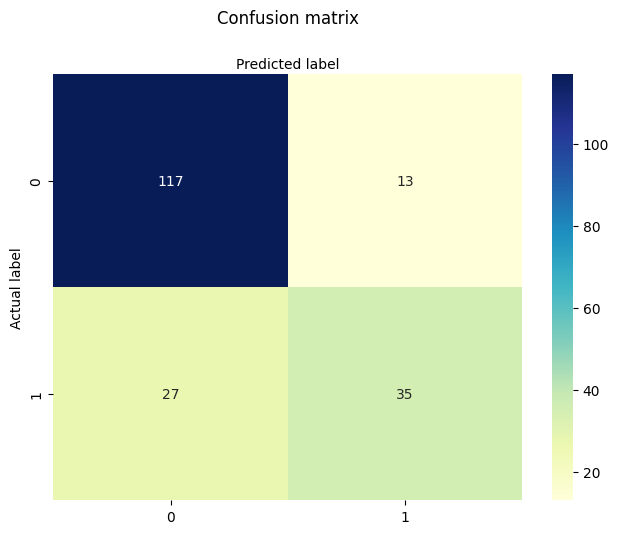

In [69]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Another way to visualise the confusion matrix

In [70]:
pip install --upgrade scikit-learn

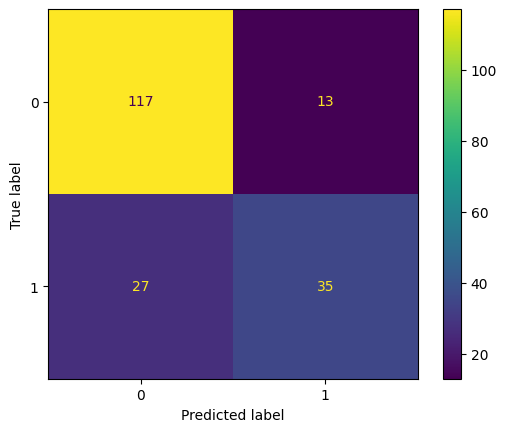

In [71]:
# An easier way to plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
disp.plot()


Confusion Matrix Evaluation Metrics

In [72]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.7916666666666666
Precision: 0.7291666666666666
Recall: 0.5645161290322581


ROC Curve

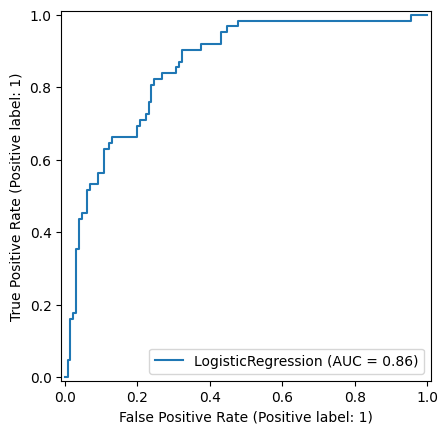

In [73]:
from sklearn.metrics import RocCurveDisplay
logreg = RocCurveDisplay.from_estimator(logreg, X1_test, y_test)


L-Reg Advantages

Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

L-Reg Disadvantages

Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.


Conclusion

In this tutorial, we covered a lot of details about predictive modelling and Regression. You have learned what the line and logistic regression is, how to build respective models, how to visualize results and some of the theoretical background information. Also, you covered some basic concepts, confusion matrix, ROC curve
